In [9]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install pyserial times numpy pandas xlsxwriter matplotlib sklearn

  Running setup.py bdist_wheel for sklearn: started
  Running setup.py bdist_wheel for sklearn: finished with status 'done'
  Stored in directory: C:\Users\Víctor\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import serial
from time import time
import numpy as np
import pandas as pd
import xlsxwriter
import matplotlib.pyplot as plt

In [109]:
ser = serial.Serial('COM3', 9600)

start_time = time()
timepoints = []
inputData = []
outputData = []
duration = 100 #total seconds to collect data

# flush any junk left in the serial buffer
ser.flushInput()
# ser.reset_input_buffer() # for pyserial 3.0+
run = True

# collect the data and plot a moving frame
while run:
    ser.reset_input_buffer()
    data = ser.readline().decode("utf-8").split(' ')
    
    # sometimes the incoming data is garbage, so just 'try' to do this
    try:
        # store the entire dataset for later
        inputData.append(float(data[0]))
        outputData.append(float(data[1]))
        timepoints.append(time()-start_time)
        current_time = timepoints[-1]
            
        # when time's up, kill the collect+plot loop
        if timepoints[-1] > duration:
            run=False
    
    # if the try statement throws an error, just do nothing
    except: pass

ser.close()

In [116]:
T_rate = 150 * 0.03264
T_rate

4.896000000000001

In [111]:
inputMax = max(inputData)
inputData = list(map(lambda x: x / inputMax, inputData))

In [112]:
outputMax = max(outputData)
outputData = list(map(lambda x: x / outputMax, outputData))

In [113]:
len(inputData)

439

In [114]:
sampleNum = 140
L = len(inputData[sampleNum:])
t = np.linspace(0, L, num=L)

<function matplotlib.pyplot.show(*args, **kw)>

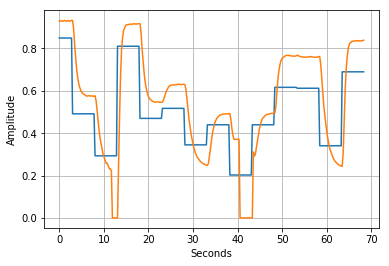

In [115]:
plt.figure()
plt.plot(t*T_rate,inputData[sampleNum:],t*T_rate,outputData[sampleNum:])
plt.ylabel(r'Amplitud (V)')
plt.xlabel(r'Segundos (s)')
plt.grid()
plt.show

In [ ]:
ydata_par = inputData
ydata_impar = outputData

workbook = xlsxwriter.Workbook('motor.xlsx')
worksheet = workbook.add_worksheet()

worksheet.write('A1', 'time')
worksheet.write('B1', 'y')
worksheet.write('C1', 'u')

k  = 1
Ts = 0.22848

for output, entry in zip(ydata_par, ydata_impar):
    worksheet.write(k, 0, Ts * k)
    worksheet.write(k, 1, output)
    worksheet.write(k, 2, entry)
    k += 1
    
workbook.close()

In [26]:
x = pd.read_excel('motorr.xlsx')
x = x.drop('time', axis=1)
x = x.drop('y0', axis=1)
x = x.drop('Unnamed: 4', axis=1)
x

,u,y
0,0,0.000000
1,0,0.000000
2,0,0.000000
3,0,0.000000
4,0,0.000000
5,0,0.000000
6,0,0.000000
7,0,0.000000
8,0,0.000000
9,0,0.000000


In [7]:
min(x["y"])

0.0

In [27]:
L = len(x)

In [28]:
q1 = pd.DataFrame()
q1['u1'] = pd.Series(x['u'], index=x.index)
q1['y1'] = pd.Series(x['y'], index=x.index)
q1 = q1.shift(periods=-1, freq=None, axis=0)
#q1 = q1.drop(q1.index[0])

x['u1'] = pd.Series(q1['u1'], index=x.index)
x['y1'] = pd.Series(q1['y1'], index=x.index)

q2 = pd.DataFrame()
q2['u2'] = pd.Series(x['u'], index=x.index)
q2['y2'] = pd.Series(x['y'], index=x.index)
q2 = q2.shift(periods=-2, freq=None, axis=0)
#q2 = q2.drop(q2.index[0:2])

x['u2'] = pd.Series(q2['u2'], index=x.index)
x['y2'] = pd.Series(q2['y2'], index=x.index)


q3 = pd.DataFrame()
q3['u3'] = pd.Series(x['u'], index=x.index)
q3['y3'] = pd.Series(x['y'], index=x.index)
q3 = q3.shift(periods=-3, freq=None, axis=0)

x['u3'] = pd.Series(q3['u3'], index=x.index)
x['y3'] = pd.Series(q3['y3'], index=x.index)


q4 = pd.DataFrame()
q4['u4'] = pd.Series(x['u'], index=x.index)
q4['y4'] = pd.Series(x['y'], index=x.index)
q4 = q4.shift(periods=-4, freq=None, axis=0)

x['u4'] = pd.Series(q4['u4'], index=x.index)
x['y4'] = pd.Series(q4['y4'], index=x.index)
'''

q5 = pd.DataFrame()
q5['input5'] = pd.Series(x['input'], index=x.index)
q5['y5'] = pd.Series(x['output'], index=x.index)
q5 = q5.shift(periods=-5, freq=None, axis=0)

x['input5'] = pd.Series(q5['input5'], index=x.index)
x['y5'] = pd.Series(q5['y5'], index=x.index)
'''

x = x.drop(x.index[L-4:L])

#y = x['antihorapos']
y = pd.DataFrame()
y['y'] = x['y']

x = x.drop('y', axis=1)

x

,u,u1,y1,u2,y2,u3,y3,u4,y4
0,0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
1,0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
2,0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
3,0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
4,0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
5,0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
6,0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
7,0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
8,0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
9,0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

In [15]:
from sklearn.linear_model import ElasticNet
model = ElasticNet()
model

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [16]:
model.fit(x_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [17]:
model.score(x_test,y_test)

0.9889757967113167

In [18]:
predicted = model.predict(x_test)

([array([974.,  97.,  82., 172., 192., 202., 332., 322., 402.,  18.]),
  array([977.,  99.,  67., 179., 226., 168., 336., 313., 410.,  18.])],
 array([-3.01822362,  1.99598772,  7.01019907, 12.02441041, 17.03862175,
        22.05283309, 27.06704444, 32.08125578, 37.09546712, 42.10967846,
        47.1238898 ]),
 <a list of 2 Lists of Patches objects>)

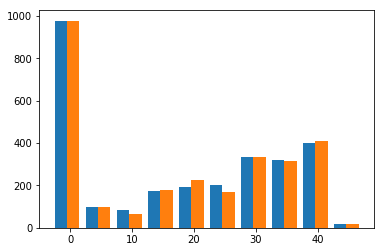

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist([predicted, y_test['output']])

In [ ]:
from deap import base, creator
# Crear clase FITNESS: ( Nombre de la clase, Delegando la clase como fitness, Posibles valores min y max del fitness )
creator.create("ControllerFitness", base.Fitness, weights=(-1.0,))

# Crear clase CROMOSOMA: ( Nombre de la clase, type de los valores de la clase, Establecer fitness con la clase anterior )
creator.create("Controller", list, fitness=creator.ControllerFitness)

In [ ]:
import random
from deap import tools

IND_SIZE = 30 # ki bits + kp bits + kd bits

# Functions to initialize populations from individuals

toolbox = base.Toolbox()

# Crear el ATRIBUTO de cromosomas ( Nombre del registro para el toolbox, Función para crear un cromosoma aleatorio )
toolbox.register("bit_attribute", random.randint, 0, 1) # random.choice, '10')

# Crear el CROMOSOMA ( Nombre del registro, , La clase cromosoma, La clase atributo, Tamaño de la población )
# Cuando se llame a toolbox.individual(), este llamará a tool.initRepeat()
toolbox.register("controller", tools.initRepeat, creator.Controller, toolbox.bit_attribute, n=IND_SIZE)

# Crear la POBLACIÓN ( Nombre del registro, , Type del cromosoma, El cromosoma )
toolbox.register("population", tools.initRepeat, list, toolbox.controller)

In [ ]:
def evaluate(controller):
    controller = ''.join(map(str,controller))
    
    # PID controller
    _kp = int(controller[0:10],2)
    _ki = int(controller[10:20],2)
    _kd = int(controller[20:30],2)
    
    kp = 0 + _kp * ( (10 - 0) / (pow(2,10) - 1) )
    ki = 0 + _ki * ( (10 - 0) / (pow(2,10) - 1) )
    kd = 0 + _kd * ( (10 - 0) / (pow(2,10) - 1) )
    
    # =====================================================================================================
    pid1 = 0
    pid2 = 0
    pid3 = 0
    pid4 = 0
    error0 = 0
    error1 = 0
    error2 = 0
    y1 = 0
    y2 = 0
    y3 = 0
    y4 = 0
    
    E = []

    setPoint = 20 #800
    Ts = 0.22848
    
    for k in np.arange(1000):      
        q1 = kp + 0.5 * Ts * ki + (kd / Ts)
        q2 = Ts * ki * 0.5 - kp - (2 * kd / Ts)
        q3 = kd / Ts

        pid0 = pid1 + q1 * error0 + q2 * error1 + q3 * error2

        pid4 = pid3
        pid3 = pid2
        pid2 = pid1
        pid1 = pid0
        error1 = error0
        error2 = error1
        
        if (pid0 > 255):
            pid0 = 255
        elif (pid0 < 0):
            pid0 = 0
        else:
            pid0 = pid0
        
        d = {'pwm': [pid0], 'pwm1': [pid1], 'y1': [y1], 'pwm2': [pid2], 'y2': [y2], 'pwm3': [pid3], 'y3': [y3], 'pwm4': [pid4], 'y4': [y4]}

        _y = model.predict(pd.DataFrame(data=d))

        y = _y[0]
        
        if (y > 252): #1023):
            y = 252 #1023
        elif (y < 0): #30):
            y = 0 #30
        else:
            y = y
            
        y1 = y
        y2 = y1
        y3 = y2
        y4 = y3
        
        error0 = setPoint - y
        E.append(error0)
    
    total_error = sum(map(abs, E))
    
    print([total_error])
    
    return (total_error),

In [ ]:
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=1, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

In [ ]:
def main():
    pop = toolbox.population(n=40)
    # pop[0:100] = prev
    CXPB, MUTPB, NGEN = 0.7, 0.1, 40

    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit

    minFit = (1,)
    #while minFit > (0.02,):
    for g in range(NGEN):
        # Select the next generation individuals
        offspring = toolbox.select(pop, len(pop))
        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))

        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = list(map(toolbox.evaluate, invalid_ind))
        minFit = min(fitnesses)
        print("=START=================================================================")
        print(fitnesses)
        print("=END===================================================================")
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        # The population is entirely replaced by the offspring
        pop[:] = offspring
    
    
    return pop

In [ ]:
kx = main()

In [ ]:
for bits in kx:
    controller = ''.join(map(str,bits))
    
    # PID controller
    _kp = int(controller[0:10],2)
    _ki = int(controller[10:20],2)
    _kd = int(controller[20:30],2)
    
    kp = 0 + _kp * ( (1 - 0) / (pow(2,10) - 1) )
    ki = 0 + _ki * ( (1 - 0) / (pow(2,10) - 1) )
    kd = 0 + _kd * ( (1 - 0) / (pow(2,10) - 1) )
    
    print([_kp,_ki,_kd,kp,ki,kd])

In [ ]:
controller = ''.join(map(str,kx[1]))
    
# PID controller
_kp = int(controller[0:10],2)
_ki = int(controller[10:20],2)
_kd = int(controller[20:30],2)

kp = 0 + _kp * ( (1 - 0) / (pow(2,10) - 1) )
ki = 0 + _ki * ( (1 - 0) / (pow(2,10) - 1) )
kd = 0 + _kd * ( (1 - 0) / (pow(2,10) - 1) )
    
print([_kp,_ki,_kd,kp,ki,kd])